In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import pysm3 as pysm
import pysm3.units as u
import scipy.constants as con
import matplotlib as mpl
import wget

In [2]:
pysm.__version__

'3.4.0'

In [3]:
mpl.rcParams['font.sans-serif'] = "Helvetica"
plt.style.use('default')

In [4]:
mask = hp.read_map("./data/mask_zero_lvl.fits")

In [5]:
pr3_wo_CMB_Wiener = hp.read_map("/global/cfs/cdirs/cmb/www/pysm-methods-paper/map_based_dust_validation/pr3_353_wo_CMB_Wiener_reso_4.94arcmin_nside_2048.fits", field = None)

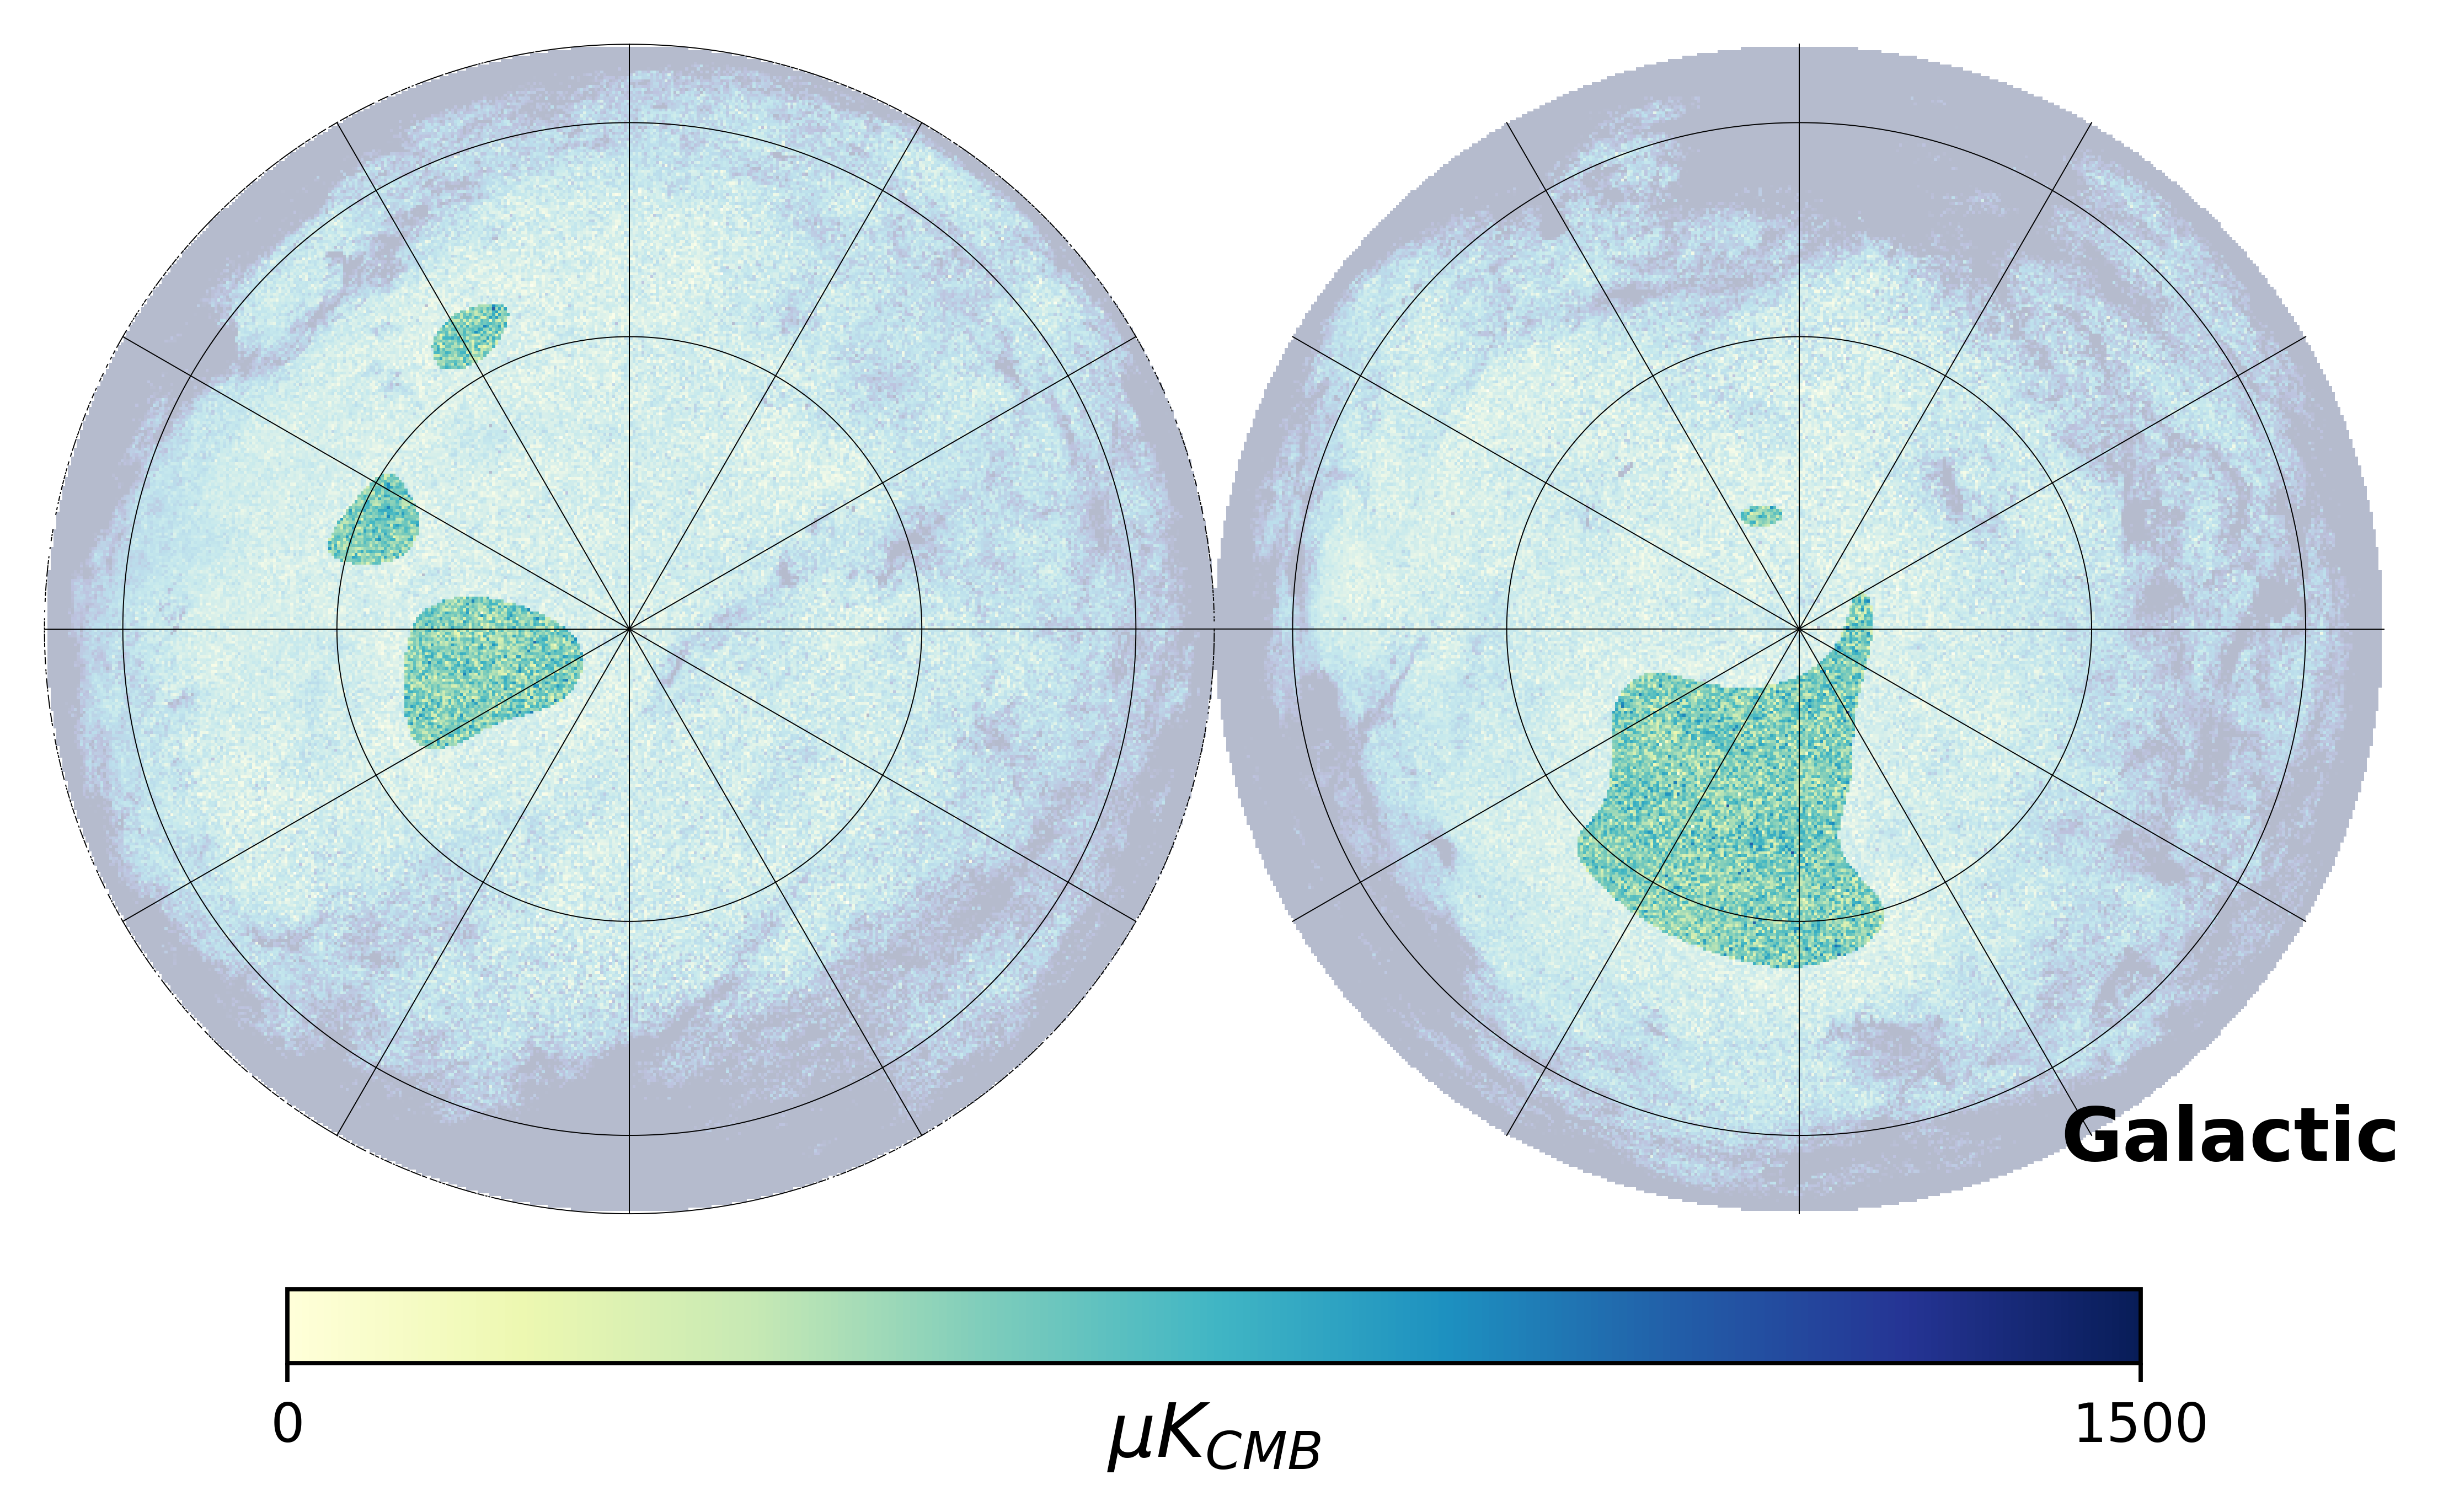

In [6]:
fig0 = plt.figure(figsize = (10, 4), dpi = 700)
alpha_mask = np.copy(mask)
alpha_mask[mask == 0] = 0.3
# hp.projview(pr3_wo_CMB_Wiener[0], rot = [0, 90], coord=["G"], cmap=plt.cm.Spectral_r, alpha = alpha_mask, min = 0, max = 1500, title = "", unit = r"$\mu K_{CMB}$", projection_type="polar", graticule = True, graticule_labels = True)
hp.orthview(pr3_wo_CMB_Wiener[0], rot = [0, 90], coord = "G", cmap=plt.cm.YlGnBu, alpha = alpha_mask, min = 0, max = 1500, title = "", unit = r"$\mu K_{CMB}$", fig = fig0.number)
hp.graticule(ls = "-", lw = .2, c = "k")
plt.savefig("../figures/mask_intxPR3_zero_lvl.svg")

In [7]:
pr3_wo_CMB_Wiener = hp.read_map("/global/cfs/cdirs/cmb/www/pysm-methods-paper/map_based_dust_validation/zero_lvl_rm_pr3_353_wo_CMB_Wiener_reso_4.94arcmin_nside_2048.fits", field = None)
d9_bpi = hp.read_map("/global/cfs/cdirs/cmb/www/pysm-methods-paper/map_based_dust_validation/zero_lvl_rm_d9_bpi_353_reso_4.94arcmin_nside_2048.fits", field = None)
d11_bpi = hp.read_map("/global/cfs/cdirs/cmb/www/pysm-methods-paper/map_based_dust_validation/zero_lvl_rm_d11_bpi_353_reso_4.94arcmin_nside_2048.fits", field = None)
d12_bpi = hp.read_map("/global/cfs/cdirs/cmb/www/pysm-methods-paper/map_based_dust_validation/zero_lvl_rm_d12_bpi_353_reso_4.94arcmin_nside_2048.fits", field = None)

In [ ]:
pr3_wo_CMB_Wiener_res_change = hp.read_map("/global/cfs/cdirs/cmb/www/pysm-methods-paper/map_based_dust_validation/pr3_353_wo_CMB_Wiener_reso_30arcmin_nside_2048.fits", field = None)
d9_bpi_res_change = hp.read_map("/global/cfs/cdirs/cmb/www/pysm-methods-paper/map_based_dust_validation/d9_bpi_353_reso_30arcmin_nside_2048.fits", field = None)
d11_bpi_res_change = hp.read_map("/global/cfs/cdirs/cmb/www/pysm-methods-paper/map_based_dust_validation/d11_bpi_353_reso_30arcmin_nside_2048.fits", field = None)
d12_bpi_res_change = hp.read_map("/global/cfs/cdirs/cmb/www/pysm-methods-paper/map_based_dust_validation/d12_bpi_353_reso_30arcmin_nside_2048.fits", field = None)

## Intensity

### Close to the galactic plane

In [ ]:
fig0 = plt.figure(figsize = (4, 6), dpi = 300)
lon = 180
lat = -10
hp.gnomview(pr3_wo_CMB_Wiener[0], rot = [lon, lat], reso = 5, min = 2.16e3, fig = fig0.number, max = 2.8e4, title = f"(a) ({lon}°, {lat}°)", sub = (2, 2, 1), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
hp.gnomview(d9_bpi[0], rot = [lon, lat], reso = 5, min = 2.16e3, fig = fig0.number, max = 2.8e4, title = f"(b) ({lon}°, {lat}°)", sub = (2, 2, 2), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
hp.gnomview(d11_bpi[0], rot = [lon, lat], reso = 5, min = 2.16e3, fig = fig0.number, max = 2.8e4, title = f"(c) ({lon}°, {lat}°)", sub = (2, 2, 3), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
hp.gnomview(d12_bpi[0], rot = [lon, lat], reso = 5, min = 2.16e3, fig = fig0.number, max = 2.8e4, title = f"(d) ({lon}°, {lat}°)", sub = (2, 2, 4), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
plt.savefig("../figures/gal_plane_non_smooth_wo_zero_lvl.svg")

### Centered on Bicep Keck patch

In [ ]:
fig0 = plt.figure(figsize = (4, 6), dpi = 300)

lon = 318
lat = -61
gnomview_pr3_wo_CMB_Wiener_res_change = hp.gnomview(pr3_wo_CMB_Wiener_res_change[0], rot = [lon, lat], reso = 5, min = 500, fig = fig0.number, max = 650, title = f"(a) ({lon}°, {lat}°)", sub = (2, 2, 1), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$", return_projected_map = True)
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
gnomview_d9_bpi_res_change = hp.gnomview(d9_bpi_res_change[0], rot = [lon, lat], reso = 5, min = 500, fig = fig0.number, max = 650, title = f"(b) ({lon}°, {lat}°)", sub = (2, 2, 2), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$", return_projected_map = True)
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
gnomview_d11_bpi_res_change = hp.gnomview(d11_bpi_res_change[0], rot = [lon, lat], reso = 5, min = 500, fig = fig0.number, max = 650, title = f"(c) ({lon}°, {lat}°)", sub = (2, 2, 3), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$", return_projected_map = True)
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
gnomview_d12_bpi_res_change = hp.gnomview(d12_bpi_res_change[0], rot = [lon, lat], reso = 5, min = 200, fig = fig0.number, max = 300, title = f"(d) ({lon}°, {lat}°)", sub = (2, 2, 4), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$", return_projected_map = True)
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
plt.savefig("../figures/BK_non_smooth_wo_zero_lvl.svg")

## Polarized intensity

### Close to the galactic plane

In [ ]:
fig0 = plt.figure(figsize = (4, 6), dpi = 300)

lon = 180
lat = -10
hp.gnomview(np.sqrt(pr3_wo_CMB_Wiener_res_change[1]**2 + pr3_wo_CMB_Wiener_res_change[2]**2), rot = [lon, lat], reso = 5, min = 0, fig = fig0.number, max = 1.5e3, title = f"(a) ({lon}°, {lat}°)", sub = (2, 2, 1), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
hp.gnomview(np.sqrt(d9_bpi_res_change[1]**2 + d9_bpi_res_change[2]**2), rot = [lon, lat], reso = 5, min = 0, fig = fig0.number, max = 1.5e3, title = f"(b) ({lon}°, {lat}°)", sub = (2, 2, 2), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
hp.gnomview(np.sqrt(d11_bpi_res_change[1]**2 + d11_bpi_res_change[2]**2), rot = [lon, lat], reso = 5, min = 0, fig = fig0.number, max = 1.5e3, title = f"(c) ({lon}°, {lat}°)", sub = (2, 2, 3), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
hp.gnomview(np.sqrt(d12_bpi_res_change[1]**2 + d12_bpi_res_change[2]**2), rot = [lon, lat], reso = 5, min = 0, fig = fig0.number, max = 1.5e3, title = f"(d) ({lon}°, {lat}°)", sub = (2, 2, 4), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
plt.savefig("../figures/pol_gal_plane_smooth_30'.svg")

### Centered on the Bicep Keck patch

In [ ]:
fig0 = plt.figure(figsize = (4, 6), dpi = 300)

lon = 318
lat = -61
hp.gnomview(np.sqrt(pr3_wo_CMB_Wiener_res_change[1]**2 + pr3_wo_CMB_Wiener_res_change[2]**2), rot = [lon, lat], reso = 5, min = 10, fig = fig0.number, max = 45, title = f"(a) ({lon}°, {lat}°)", sub = (2, 2, 1), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
hp.gnomview(np.sqrt(d9_bpi_res_change[1]**2 + d9_bpi_res_change[2]**2), rot = [lon, lat], reso = 5, min = 10, fig = fig0.number, max = 45, title = f"(b) ({lon}°, {lat}°)", sub = (2, 2, 2), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
hp.gnomview(np.sqrt(d11_bpi_res_change[1]**2 + d11_bpi_res_change[2]**2), rot = [lon, lat], reso = 5, min = 10, fig = fig0.number, max = 45, title = f"(c) ({lon}°, {lat}°)", sub = (2, 2, 3), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
hp.gnomview(np.sqrt(d12_bpi_res_change[1]**2 + d12_bpi_res_change[2]**2), rot = [lon, lat], reso = 5, min = 10, fig = fig0.number, max = 45, title = f"(d) ({lon}°, {lat}°)", sub = (2, 2, 4), notext= True, cmap = plt.cm.hot, unit = r"$\mu K_{CMB}$")
hp.graticule(lw = 0.3, color = "white", dpar=4, dmer = 4)
plt.savefig("../figures/pol_BK_smooth_30'.svg")